This notebook is to extract density and mean temperature values from maps resulted from the DEM analysis

In [91]:
import warnings
warnings.simplefilter('ignore')

import glob
import datetime
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
from matplotlib.ticker import AutoMinorLocator
from sunpy.map import Map
import astropy.units as u
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord
import os.path
script_path = os.path.abspath('./scripts')
from sys import path as sys_path
if script_path not in sys_path:
    sys_path.append(script_path)
from tqdm import tqdm

# set the directory path where the data is stored
data_dir = '/home/mnedal/data'

In [2]:
dens_files = sorted(glob.glob(f'{data_dir}/tornado_files/dens_dem_fits/*.fits'))
temp_files = sorted(glob.glob(f'{data_dir}/tornado_files/temp_dem_fits/*.fits'))
print(len(dens_files), len(dens_files))

558 558


In [3]:
datetimes = []
for file in dens_files:
    date_str = file.split('/')[-1][:-5].split('T')[0]
    time_str = file.split('/')[-1][:-5].split('T')[1]
    
    formatted_date = f'{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}'
    formatted_time = f'{time_str[:2]}:{time_str[2:4]}:{time_str[4:]}'
    
    datetimes.append(f'{formatted_date} {formatted_time}')

In [56]:
len(datetimes)

558

In [93]:
# The datetime string you want to find
search_datetime = '2024-05-14 17:36:00'
# search_datetime = '2024-05-14 17:40:00'

try:
    # Get the index of the datetime string
    index = datetimes.index(search_datetime)
    print(f'The index of {search_datetime} is: {index}')
except ValueError:
    print(f'{search_datetime} not found in the list!\nFind the nearest one ..')
    # Convert the list of datetime strings to datetime objects
    datetime_objects = [datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in datetimes]
    # Convert the search string to a datetime object
    search_dt = datetime.datetime.strptime(search_datetime, '%Y-%m-%d %H:%M:%S')
    # Find the nearest datetime by calculating the minimum difference
    nearest_dt = min(datetime_objects, key=lambda dt: abs(dt - search_dt))
    # Find the index of the nearest datetime
    index = datetime_objects.index(nearest_dt)
    print(f'The index of {search_datetime} is: {index}')

2024-05-14 17:36:00 not found in the list!
Find the nearest one ..
The index of 2024-05-14 17:36:00 is: 138


1.35e+06


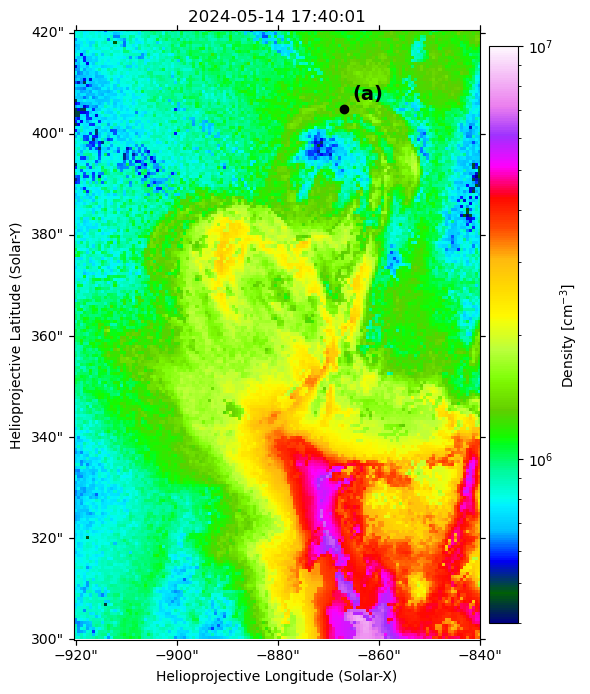

In [44]:
# Extract the value at the specified point
point_coord = SkyCoord(-867 * u.arcsec, 405 * u.arcsec, frame=dens_map.coordinate_frame)
x_pixel, y_pixel = dens_map.wcs.world_to_pixel(point_coord)

# Extract the value at the calculated pixel coordinates
density = dens_map.data[int(y_pixel), int(x_pixel)]
print(f'{density:.2e}')

fig = plt.figure(figsize=[6,8])
dens_map = Map(dens_files[index])
ax = fig.add_subplot(projection=dens_map)
img = dens_map.plot(axes=ax,
             norm=colors.LogNorm(vmin=4e5, vmax=1e7),
             cmap='gist_ncar') 
plt.colorbar(img, fraction=0.065, pad=0.02, label=r'Density [cm$^{-3}$]')
ax.grid(False)
ax.set_title(datetimes[index])
# Mark the point on the map
ax.plot(x_pixel, y_pixel, 'ko')
ax.text(x_pixel + 3, y_pixel + 3, '(a)', color='k', fontsize=14, weight='bold')
fig.tight_layout()
plt.show()

In [94]:
points = {
    '(a)': [-883*u.arcsec, 345*u.arcsec],
    '(b)': [-890*u.arcsec, 380*u.arcsec],
    '(c)': [-864*u.arcsec, 372*u.arcsec],
    '(d)': [-867*u.arcsec, 405*u.arcsec]
}

# Extract the value at the specified point
# Extract the value at the calculated pixel coordinates
# Mark the point on the map
# densities, temperatures = [], []
# for point in points:
#     point_d_coord = SkyCoord(points[point][0], points[point][1], frame=dens_map.coordinate_frame)
#     xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
#     density = dens_map.data[int(yd_pixel), int(xd_pixel)]
#     densities.append(density)
    
#     point_t_coord = SkyCoord(points[point][0], points[point][1], frame=temp_map.coordinate_frame)
#     xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
#     temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
#     temperatures.append(temperature)

Frame time: 2024-05-14 17:36:01


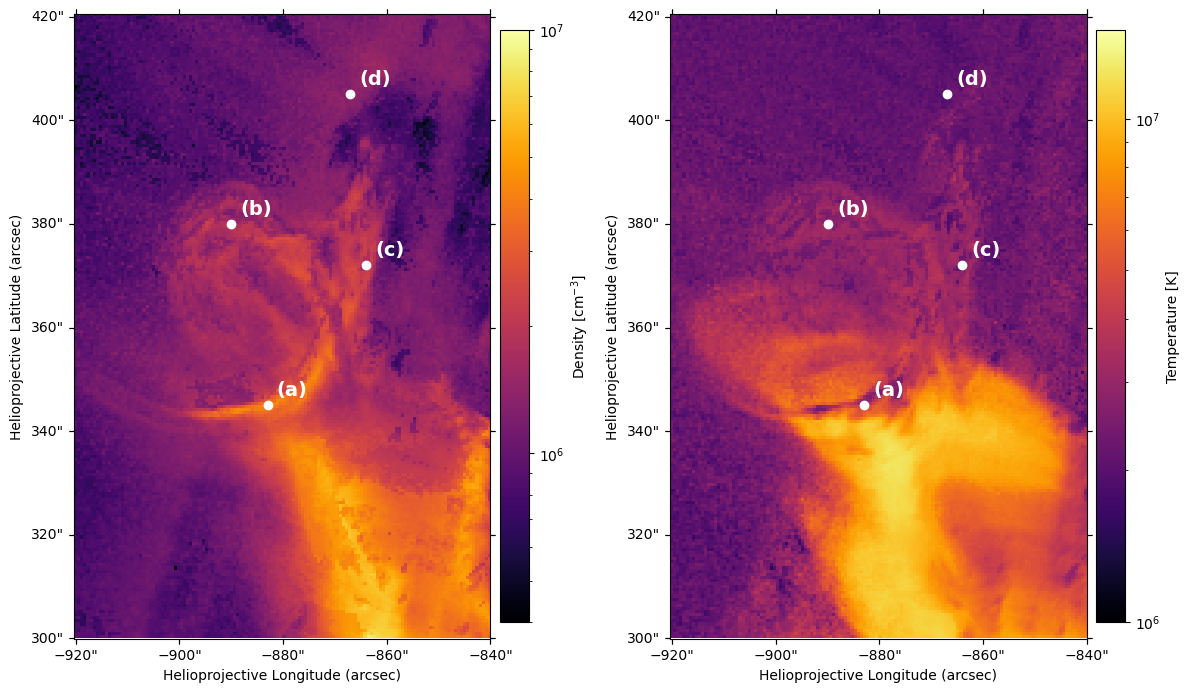

In [110]:
print(f'Frame time: {datetimes[index]}')

fig = plt.figure(figsize=[12,8])

dens_map = Map(dens_files[index])
ax = fig.add_subplot(121, projection=dens_map)
img = dens_map.plot(axes=ax,
             norm=colors.LogNorm(vmin=4e5, vmax=1e7),
             cmap='inferno')
plt.colorbar(img, fraction=0.065, pad=0.02, label=r'Density [cm$^{-3}$]')
ax.grid(False)
# ax.set_title(datetimes[index])
ax.set_title('')
ax.set_xlabel('Helioprojective Longitude (arcsec)')
ax.set_ylabel('Helioprojective Latitude (arcsec)')
for point in points:
    point_d_coord = SkyCoord(points[point][0], points[point][1], frame=dens_map.coordinate_frame)
    xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
    # density = dens_map.data[int(yd_pixel), int(xd_pixel)]
    # densities[point].append(density)
    ax.plot(xd_pixel, yd_pixel, 'wo')
    ax.text(xd_pixel+3, yd_pixel+3, point, color='w', fontsize=14, weight='bold')

temp_map = Map(temp_files[index])
ax = fig.add_subplot(122, projection=temp_map)
img = temp_map.plot(axes=ax,
                    norm=colors.LogNorm(vmin=1e6, vmax=1.5e7),
                    cmap='inferno')
plt.colorbar(img, fraction=0.065, pad=0.02, label='Temperature [K]')
ax.grid(False)
# ax.set_title(datetimes[index])
ax.set_title('')
ax.set_xlabel('Helioprojective Longitude (arcsec)')
ax.set_ylabel('Helioprojective Latitude (arcsec)')
for point in points:
    point_t_coord = SkyCoord(points[point][0], points[point][1], frame=temp_map.coordinate_frame)
    xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
    # temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
    # temperatures[point].append(temperature)
    ax.plot(xt_pixel, yt_pixel, 'wo')
    ax.text(xt_pixel+3, yt_pixel+3, point, color='w', fontsize=14, weight='bold')
    
fig.tight_layout()
fig.savefig(f'{data_dir}/dens_temp_maps_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [53]:
densities

{'(a)': [2750885.1150786537],
 '(b)': [2515025.6453338694],
 '(c)': [2607636.006365278],
 '(d)': [1349421.4433674007]}

### Extract densities from all frames at the four points

In [57]:
densities = {'(a)': [], '(b)': [], '(c)': [], '(d)': []}

with tqdm(total=len(dens_files), desc='Extract densities ...') as pbar:
    for file in dens_files:
        dens_map = Map(file)
        for point in points:
            point_d_coord = SkyCoord(points[point][0], points[point][1], frame=dens_map.coordinate_frame)
            xd_pixel, yd_pixel = dens_map.wcs.world_to_pixel(point_d_coord)
            density = dens_map.data[int(yd_pixel), int(xd_pixel)]
            densities[point].append(density)
        pbar.update(1)

Extract densities ...: 100%|████████████████████████████████████████| 558/558 [01:26<00:00,  6.48it/s]


In [83]:
temperatures = {'(a)': [], '(b)': [], '(c)': [], '(d)': []}

with tqdm(total=len(temp_files), desc='Extract temperatures ...') as pbar:
    for file in temp_files:
        temp_map = Map(file)
        for point in points:
            point_t_coord = SkyCoord(points[point][0], points[point][1], frame=temp_map.coordinate_frame)
            xt_pixel, yt_pixel = temp_map.wcs.world_to_pixel(point_t_coord)
            temperature = temp_map.data[int(yt_pixel), int(xt_pixel)]
            temperatures[point].append(temperature)
        pbar.update(1)

Extract temperatures ...: 100%|█████████████████████████████████████| 558/558 [01:24<00:00,  6.59it/s]


In [84]:
datetime_objects = [datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in datetimes]

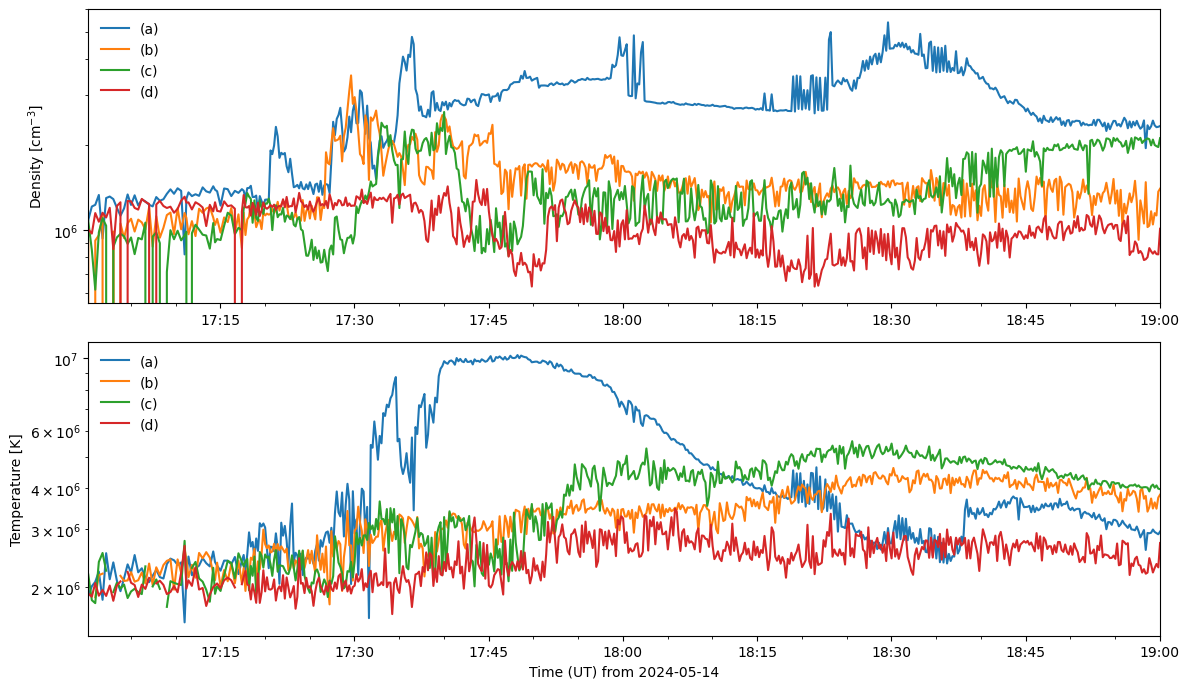

In [92]:
# Define different line styles
# line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, and dotted

fig = plt.figure(figsize=[12,7])

ax = fig.add_subplot(211)
# Loop over densities and line styles
for i, point in enumerate(densities):
    ax.plot(datetime_objects, densities[point], label=point)
    # ax.plot(datetime_objects, densities[point], label=point, linestyle=line_styles[i % len(line_styles)])
ax.set_yscale('log')
ax.legend(loc='upper left', frameon=False)
ax.set_ylabel(r'Density [cm$^{-3}$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])

ax = fig.add_subplot(212)
# Loop over densities and line styles
for i, point in enumerate(temperatures):
    ax.plot(datetime_objects, temperatures[point], label=point)
ax.set_yscale('log')
ax.legend(loc='upper left', frameon=False)
ax.set_ylabel('Temperature [K]')
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=datetime_objects[0], right=datetime_objects[-1])
ax.set_xlabel(f"Time (UT) from {str(dens_map.date).split('T')[0]}")

fig.tight_layout()
fig.savefig(f'{data_dir}/dens_temp_tornado.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [106]:
print('Density')
for point in densities:
    dens = densities[point]
    nmax = np.nanmax(dens)
    navg = np.nanmean(dens)
    nmin = np.nanmin(dens)
    print(point)
    print(f'Nmax = {nmax:.2e}')
    print(f'Navg = {navg:.2e}')
    print(f'Nmin = {nmin:.2e}\n')

print('\nTemperature')
for point in temperatures:
    temp = temperatures[point]
    tmax = np.nanmax(temp)
    tavg = np.nanmean(temp)
    tmin = np.nanmin(temp)
    print(point)
    print(f'Tmax = {tmax:.2e}')
    print(f'Tavg = {tavg:.2e}')
    print(f'Tmin = {tmin:.2e}\n')

Density
(a)
Nmax = 5.40e+06
Navg = 2.77e+06
Nmin = 8.19e+05

(b)
Nmax = 3.51e+06
Navg = 1.47e+06
Nmin = 0.00e+00

(c)
Nmax = 2.61e+06
Navg = 1.38e+06
Nmin = 0.00e+00

(d)
Nmax = 1.50e+06
Navg = 1.01e+06
Nmin = 0.00e+00


Temperature
(a)
Tmax = 1.02e+07
Tavg = 4.74e+06
Tmin = 1.56e+06

(b)
Tmax = 4.61e+06
Tavg = 3.40e+06
Tmin = 1.77e+06

(c)
Tmax = 5.57e+06
Tavg = 3.78e+06
Tmin = 1.74e+06

(d)
Tmax = 3.46e+06
Tavg = 2.46e+06
Tmin = 1.65e+06

